In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,explained_variance_score
import warnings  
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,explained_variance_score
import warnings  
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Data

## Power Consumption data

In [3]:
pjme_df = pd.read_csv('./Full_Data.csv', parse_dates=[0], index_col=[0])
pjme_df = pjme_df.loc[~pjme_df.index.duplicated(keep='first')].sort_index().dropna()
pjme_df.head()

,electric_power,EP_1_DAY_AGo,EP_1_Week_AGo,EP_4_Weeks_AGo,EP_Next_hour,electric_power_rolling_avg_one_day,electric_power_rolling_avg_one_week
tz,,,,,,,
2017-02-06 07:30:00,26.597063,0.0,0.0,0.0,30.096608,0.0,0.0
2017-02-06 08:30:00,30.096608,0.0,0.0,0.0,30.744339,0.0,0.0
2017-02-06 09:30:00,30.744339,0.0,0.0,0.0,30.696277,0.0,0.0
2017-02-06 10:30:00,30.696277,0.0,0.0,0.0,29.545297,0.0,0.0
2017-02-06 11:30:00,29.545297,0.0,0.0,0.0,29.500755,0.0,0.0


In [4]:
pjme_df.shape

(15153, 7)

In [5]:
pjme_df.describe()

,electric_power,EP_1_DAY_AGo,EP_1_Week_AGo,EP_4_Weeks_AGo,EP_Next_hour,electric_power_rolling_avg_one_day,electric_power_rolling_avg_one_week
count,15153.000000,15153.000000,15153.000000,15153.000000,15153.000000,15153.000000,15153.000000
mean,6.946251,6.932290,6.861642,6.619761,6.944495,4.893745,4.821543
std,5.760984,5.766693,5.803998,5.922748,5.759048,5.872368,5.885371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.849544,6.844251,6.830669,6.781914,6.849378,6.652776,0.000000
75%,8.936326,8.926981,8.888963,8.798298,8.936110,7.895515,7.895515
max,36.533492,36.533492,36.533492,36.533492,36.533492,21.710769,21.710769


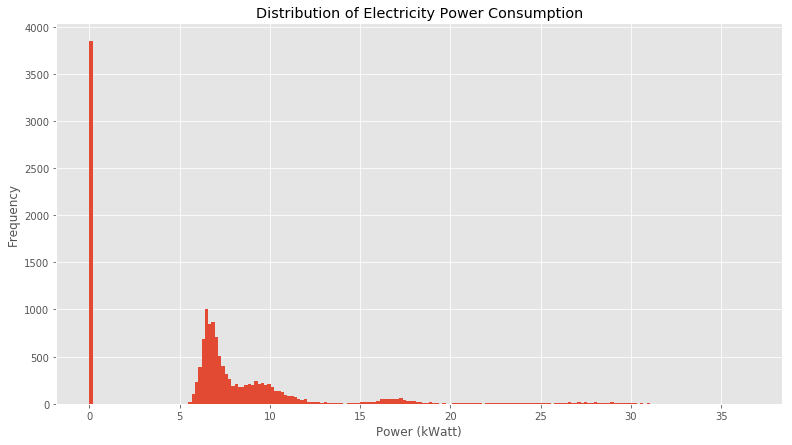

In [6]:
_ = pjme_df.electric_power.plot.hist(figsize=(13, 7), bins=200, title='Distribution of Electricity Power Consumption')
plt.xlabel('Power (kWatt)')
plt.show()

## Weather Data

### Combine Power and weather data

### Power and weather data visualization

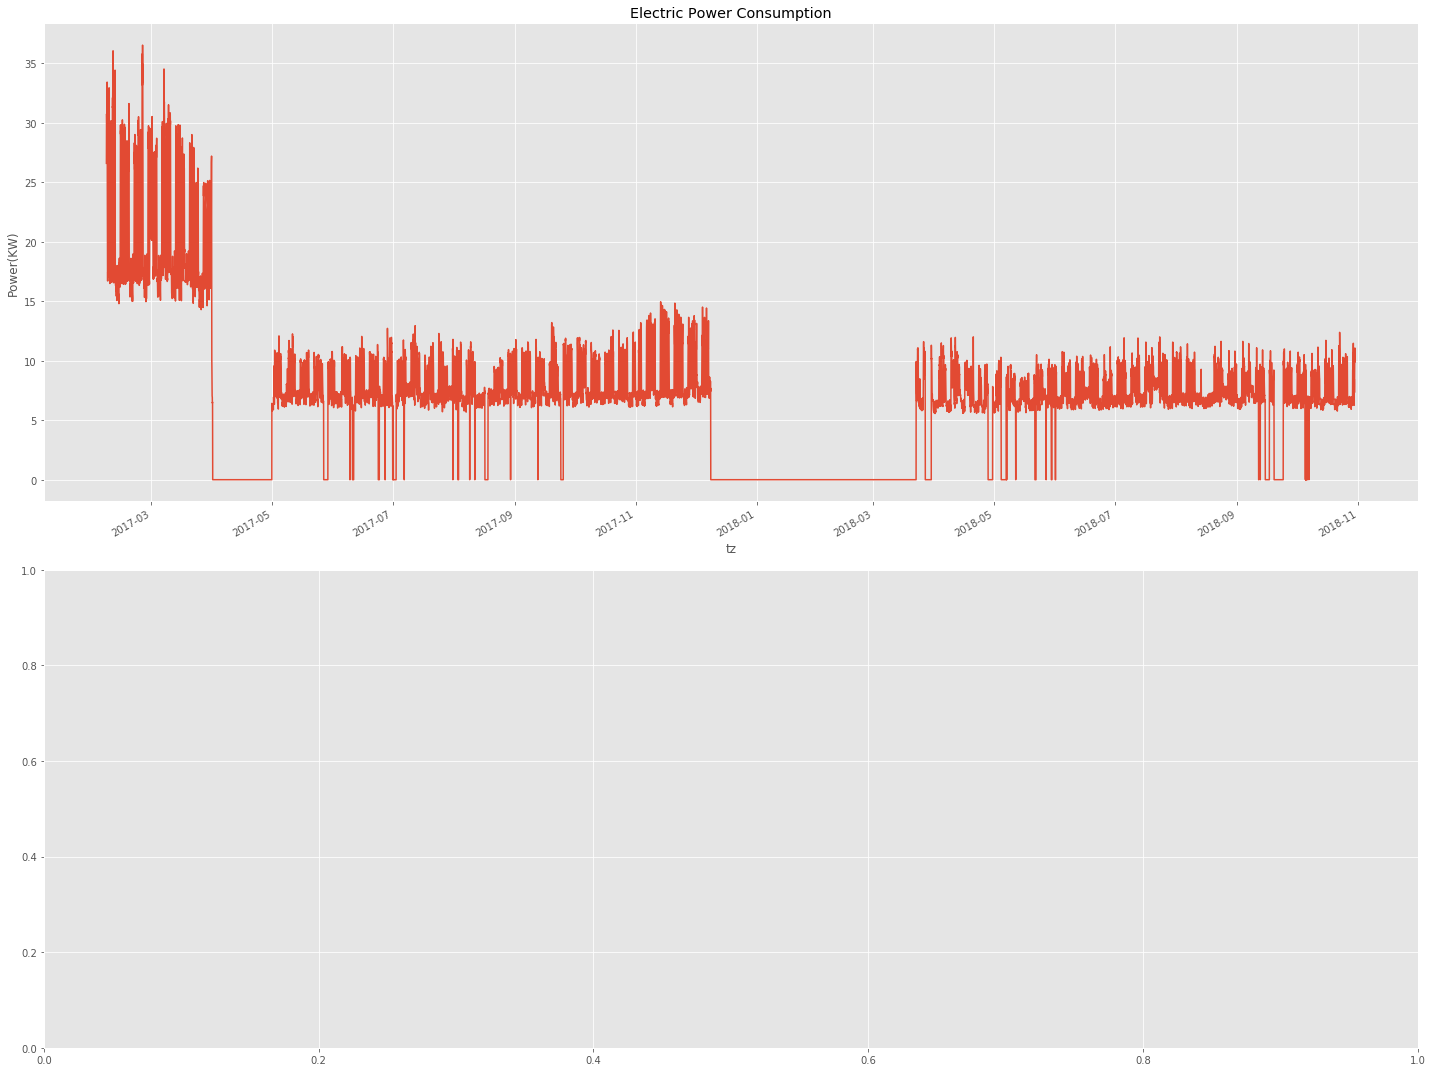

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
axes[0].set_title('Electric Power Consumption')
axes[0].set_ylabel('Power(KW)')
axes[0].set_xlabel('Datetime')
pjme_df.electric_power.plot(ax=axes[0])




plt.tight_layout()
plt.show()

## Time series features

* Adding time series features.

In [8]:
pjme_df.head()

,electric_power,EP_1_DAY_AGo,EP_1_Week_AGo,EP_4_Weeks_AGo,EP_Next_hour,electric_power_rolling_avg_one_day,electric_power_rolling_avg_one_week
tz,,,,,,,
2017-02-06 07:30:00,26.597063,0.0,0.0,0.0,30.096608,0.0,0.0
2017-02-06 08:30:00,30.096608,0.0,0.0,0.0,30.744339,0.0,0.0
2017-02-06 09:30:00,30.744339,0.0,0.0,0.0,30.696277,0.0,0.0
2017-02-06 10:30:00,30.696277,0.0,0.0,0.0,29.545297,0.0,0.0
2017-02-06 11:30:00,29.545297,0.0,0.0,0.0,29.500755,0.0,0.0


## Features correlation heatmap

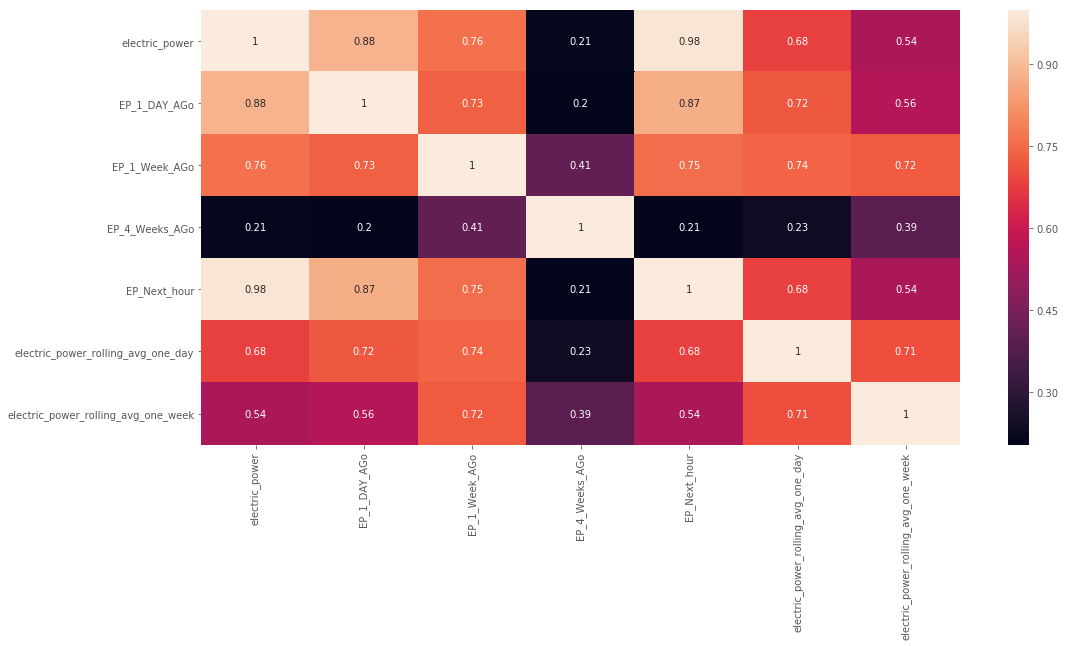

In [9]:
fig, ax = plt.subplots(figsize = (17,8))
corr = pjme_df.corr()
ax = sns.heatmap(corr, annot=True,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
plt.show()

* **Power consumption** is highly correlated to the **hour**.

## Regression Models

## Lagging features


In [10]:

# Build lagged weather predictors.
# lagged_df = comb_df.loc[comb_df.index.min().ceil('D'):].copy()
lagged_df = pjme_df.copy()

# Next day's load values.
lagged_df['load_tomorrow'] = lagged_df['electric_power'].shift(-24)    

for day in range(8):
    lagged_df['EP_1_DAY_AGo_d' + str(day)] = lagged_df.EP_1_DAY_AGo.shift(24*day)
    lagged_df['EP_1_Week_AGo_d' + str(day)] = lagged_df.EP_1_Week_AGo.shift(24*day)
    lagged_df['EP_4_Weeks_AGo' + str(day)] = lagged_df.EP_4_Weeks_AGo.shift(24*day)
    lagged_df['EP_Next_hour_d' + str(day)] = lagged_df.EP_Next_hour.shift(24*day)
    lagged_df['electric_power_rolling_avg_one_day_d' + str(day)] = lagged_df.electric_power_rolling_avg_one_day.shift(24*day)
    lagged_df['electric_power_rolling_avg_one_week_d' + str(day)] = lagged_df.electric_power_rolling_avg_one_week.shift(24*day)
    lagged_df['load_d' + str(day)] = lagged_df.electric_power.shift(24*day)
   
    


     
lagged_df = lagged_df.dropna()
    

lagged_df = lagged_df.drop(columns=['EP_1_DAY_AGo','EP_1_Week_AGo','EP_4_Weeks_AGo','EP_Next_hour','electric_power_rolling_avg_one_day','electric_power_rolling_avg_one_week','electric_power'])
# lagged_df.iloc[50:80]



In [11]:
lagged_df.tail(5)

,load_tomorrow,EP_1_DAY_AGo_d0,EP_1_Week_AGo_d0,EP_4_Weeks_AGo0,EP_Next_hour_d0,electric_power_rolling_avg_one_day_d0,electric_power_rolling_avg_one_week_d0,load_d0,EP_1_DAY_AGo_d1,EP_1_Week_AGo_d1,...,electric_power_rolling_avg_one_day_d6,electric_power_rolling_avg_one_week_d6,load_d6,EP_1_DAY_AGo_d7,EP_1_Week_AGo_d7,EP_4_Weeks_AGo7,EP_Next_hour_d7,electric_power_rolling_avg_one_day_d7,electric_power_rolling_avg_one_week_d7,load_d7
tz,,,,,,,,,,,,,,,,,,,,,
2018-10-29 11:30:00,11.071924,6.113942,10.791823,9.087273,8.772211,7.653226,7.557639,8.525509,6.262288,5.905070,...,7.557639,7.427220,9.698699,5.905070,10.173165,10.702522,10.874629,7.523524,7.396724,10.791823
2018-10-29 12:30:00,10.741479,6.015793,10.874629,9.812068,9.484859,7.654179,7.565045,8.772211,6.091587,5.855681,...,7.565045,7.427773,9.538340,5.855681,9.630437,10.279495,11.223755,7.522900,7.400893,10.874629
2018-10-29 13:30:00,10.163620,6.002803,11.223755,9.676648,9.654269,7.654877,7.575087,9.484859,6.178693,5.885505,...,7.575087,7.433859,8.993180,5.885505,9.536622,10.236461,10.997043,7.522353,7.405350,11.223755
2018-10-29 14:30:00,9.992667,5.920353,10.997043,9.953229,10.016429,7.655783,7.584094,9.654269,6.116038,5.768235,...,7.584094,7.439860,8.663304,5.768235,9.483979,10.221975,10.368045,7.521195,7.408955,10.997043
2018-10-29 15:30:00,9.924275,6.024754,10.368045,9.684885,11.468788,7.655820,7.588294,10.016429,6.127198,6.018489,...,7.588294,7.445980,8.668408,6.018489,9.662386,9.505391,8.004700,7.520777,7.415218,10.368045


In [12]:
X = lagged_df.drop(columns=['load_tomorrow'])
y = lagged_df['load_tomorrow']

In [13]:
X.shape

(14961, 56)

In [14]:
y.shape

(14961,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [16]:
def plot_prediction(actual, prediction, start_date, end_date, title, prediction_label):
    plt.figure(figsize=(20,5))
    plt.title(title)
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, prediction, label=prediction_label)
    plt.ylabel('Power(KW)')
    plt.xlabel('Datetime')
    plt.legend()
    plt.xlim(left= start_date, right=end_date)
    plt.show()
    
def subplot_prediction(actual, prediction,prediction_label):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))
    
    con_df = pd.concat([actual.rename('Actual'),pd.DataFrame(prediction, index=actual.index, columns=[prediction_label])], axis=1)
    axes[0].set_title('Actual vs Prediction - One day')
    axes[0].set_ylabel('Power(KW)')
    axes[0].set_xlabel('Datetime')
    con_df.plot(ax=axes[0])
    axes[0].set_xlim(left=con_df.index[-24*1] , right=con_df.index[-1])
    
    axes[1].set_title('Actual vs Prediction - One week')
    axes[1].set_ylabel('Power(KW)')
    axes[1].set_xlabel('Datetime')
    con_df.plot(ax=axes[1])
    axes[1].set_xlim(left=actual.index[-24*7] , right=actual.index[-1])
    
    axes[2].set_title('Actual vs Prediction - One month')
    axes[2].set_ylabel('Power(KW)')
    axes[2].set_xlabel('Datetime')
    con_df.plot(ax=axes[2])
    axes[2].set_xlim(left=actual.index[-24*7*4] , right=actual.index[-1])
    
    plt.tight_layout()
    plt.show()
    
def plot_feature_importances( clf, X_train, y_train=None
                             ,top_n=10, figsize=(10,18), print_table=False, title="Feature Importances"):
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp


In [87]:
reg = xgb.XGBRegressor()


In [88]:
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

[15:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 91.83 
[0.97886255 0.85768284]
[15:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score :0.86 
<function r2_score at 0x00000182B5568AE8>


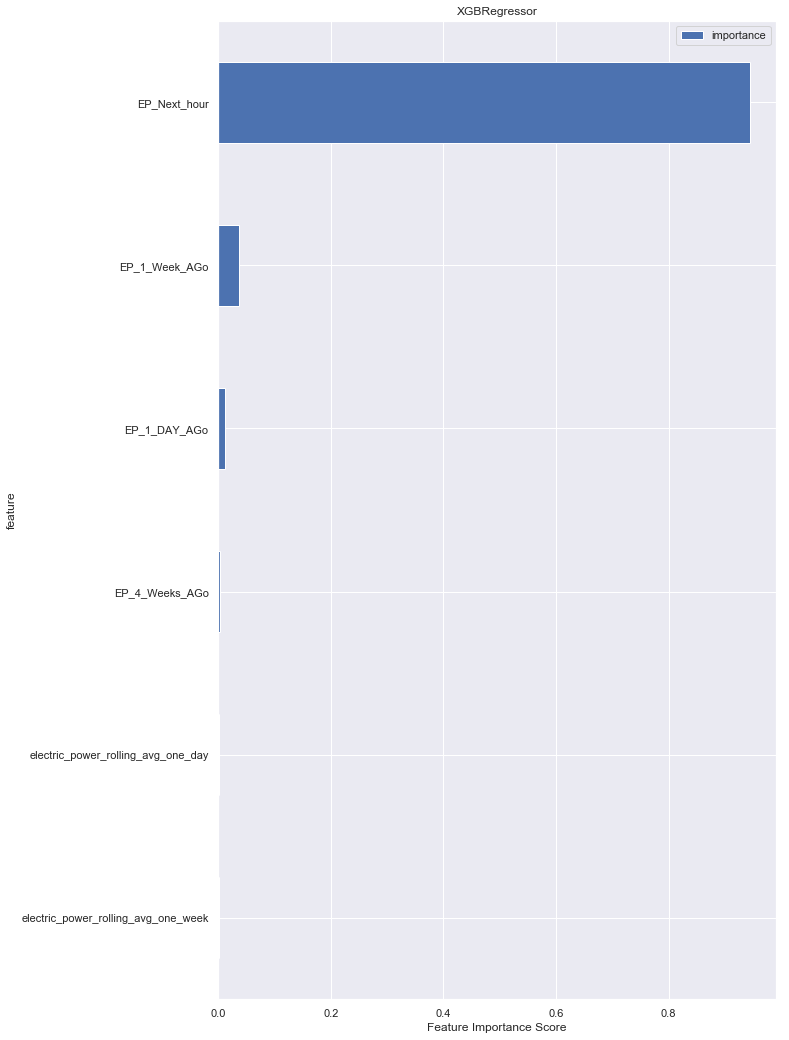

Top 6 features in descending order of importance


,importance
feature,
EP_Next_hour,0.943732
EP_1_Week_AGo,0.036947
EP_1_DAY_AGo,0.012319
EP_4_Weeks_AGo,0.003566
electric_power_rolling_avg_one_day,0.001893
electric_power_rolling_avg_one_week,0.001543


In [89]:
_ = plot_feature_importances(reg, X_train, y_train, top_n=X_train.shape[1], title=reg.__class__.__name__, print_table=True)


In [90]:
pjme_df.head()

,electric_power,EP_1_DAY_AGo,EP_1_Week_AGo,EP_4_Weeks_AGo,EP_Next_hour,electric_power_rolling_avg_one_day,electric_power_rolling_avg_one_week
tz,,,,,,,
2017-02-06 07:30:00,26.597063,0.0,0.0,0.0,30.096608,0.0,0.0
2017-02-06 08:30:00,30.096608,0.0,0.0,0.0,30.744339,0.0,0.0
2017-02-06 09:30:00,30.744339,0.0,0.0,0.0,30.696277,0.0,0.0
2017-02-06 10:30:00,30.696277,0.0,0.0,0.0,29.545297,0.0,0.0
2017-02-06 11:30:00,29.545297,0.0,0.0,0.0,29.500755,0.0,0.0


In [91]:
def get_features(date, pjme_df):
    features = pjme_df.loc[date]
    features = (features.assign(
                                day_of_week = features.index.dayofweek
                                ,year = features.index.year
                                ,month = features.index.month
                                ,day = features.index.day
                                ,day_of_year = features.index.dayofyear
                                ,week = features.index.week
                                ,week_day = features.index.weekday_name 
                                ,quarter = features.index.quarter
                                ,hour = features.index.hour
                                ,hour_x = np.sin(2.*np.pi*features.index.hour/24.)
                                ,hour_y = np.cos(2*np.pi*features.index.hour/24.)
                                ,day_of_year_x = np.sin(2.*np.pi*features.index.dayofyear/365.)
                                ,day_of_year_y = np.cos(2.*np.pi*features.index.dayofyear/365.)
                                
                                ))
    
    for day in range(8):
         features['EP_1_DAY_AGo_d' + str(day)] = features.EP_1_DAY_AGo.shift(24*day)
    features['EP_1_Week_AGo_d' + str(day)] = features.EP_1_Week_AGo.shift(24*day)
    features['EP_4_Weeks_AGo' + str(day)] = features.EP_4_Weeks_AGo.shift(24*day)
    features['EP_Next_hour_d' + str(day)] = features.EP_Next_hour.shift(24*day)
    features['electric_power_rolling_avg_one_day_d' + str(day)] = features.electric_power_rolling_avg_one_day.shift(24*day)
    features['electric_power_rolling_avg_one_week_d' + str(day)] = features.electric_power_rolling_avg_one_week.shift(24*day)
    features['load_d' + str(day)] = features.electric_power.shift(24*day)
   
    features = features.dropna()
    
    features = features.drop(columns=['EP_1_DAY_AGo','EP_1_Week_AGo','EP_4_Weeks_AGo','EP_Next_hour','electric_power_rolling_avg_one_day','electric_power_rolling_avg_one_week','electric_power'])

    return features





# Regression Models

In [92]:
X = pjme_df.drop(columns = ['electric_power'])
y = pjme_df['electric_power']

In [93]:
X.shape

(15153, 6)

In [94]:
y.shape

(15153,)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

## XGB Model


In [96]:
reg = xgb.XGBRegressor()

In [137]:
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))
print(scores)

Accuracy: 0.91 (+/- 0.07)
[0.97885325 0.84161719]


In [138]:
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Accuracy: 91.02 
[0.97885325 0.84161719]
R2 Score :0.84 
<function r2_score at 0x00000182B5568AE8>


In [139]:
_ = plot_importance(reg, height=0.9)

ValueError: tree must be Booster, XGBModel or dict instance

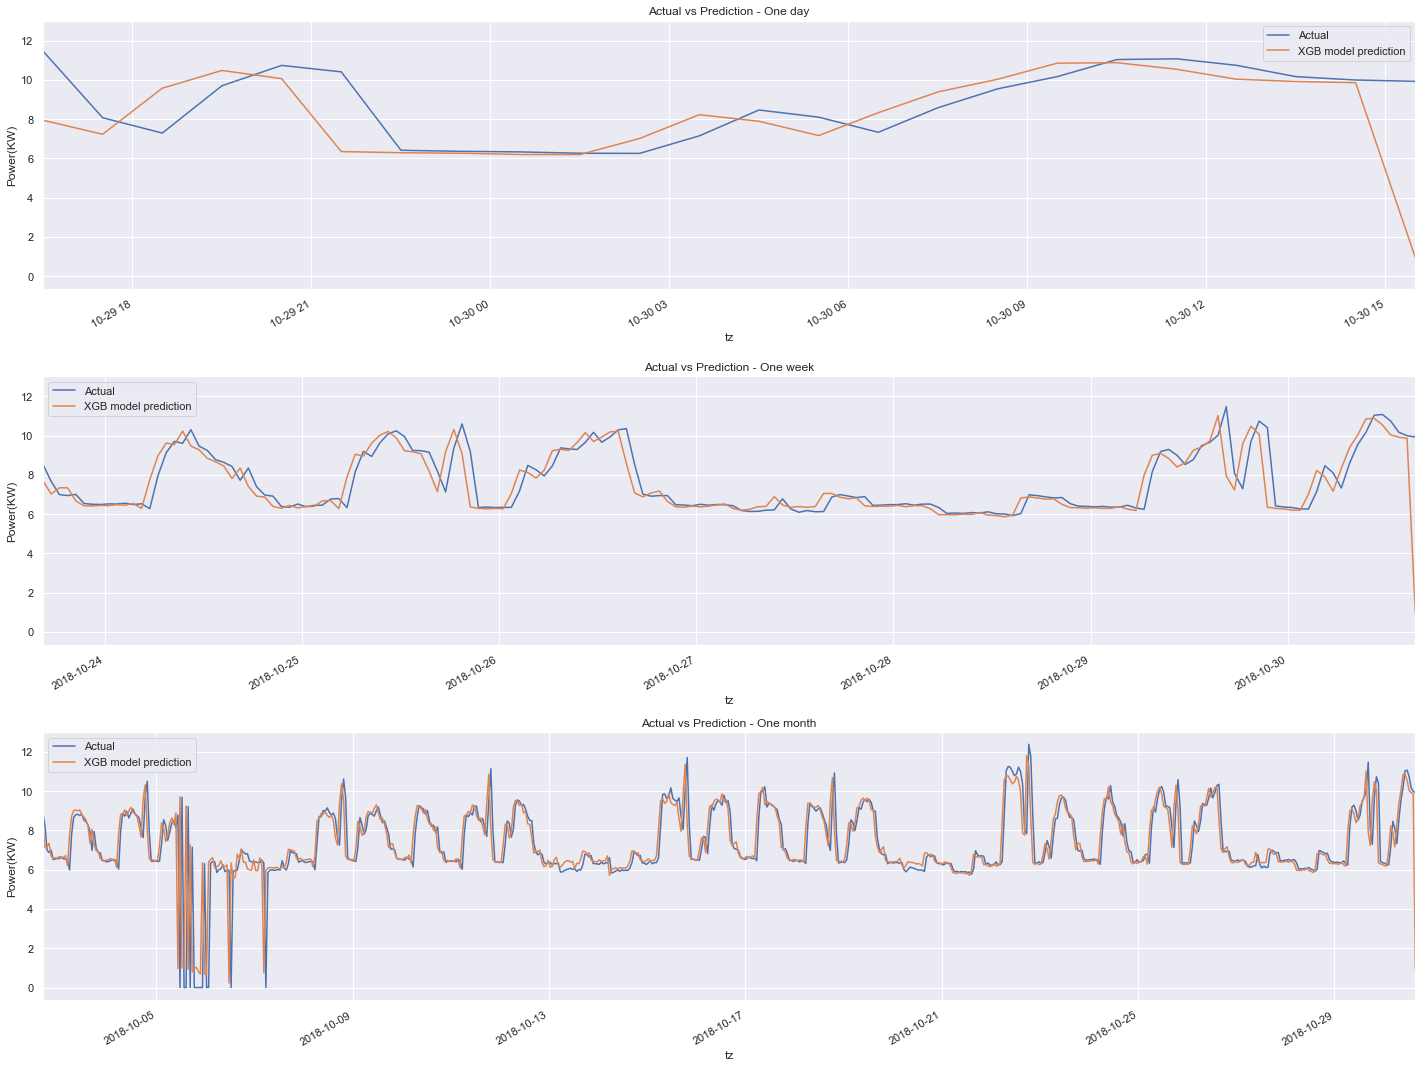

In [140]:
subplot_prediction(y_test, prediction,prediction_label='XGB model prediction')

# AdaBoost Model

In [142]:
reg = AdaBoostRegressor()

In [143]:
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Accuracy: 55.88 
[0.58763732 0.53000414]
R2 Score :0.25 
<function r2_score at 0x00000182B5568AE8>


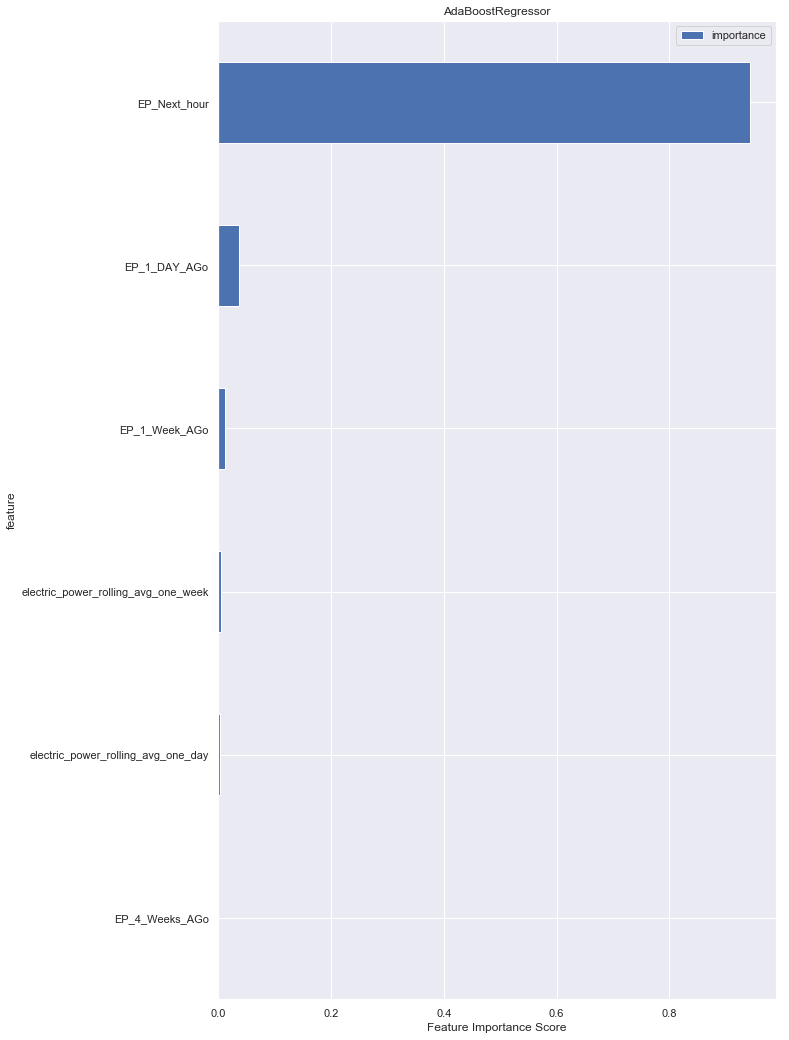

In [144]:
_ = plot_feature_importances(reg, X_train, y_train, top_n=X_train.shape[1], title=reg.__class__.__name__)

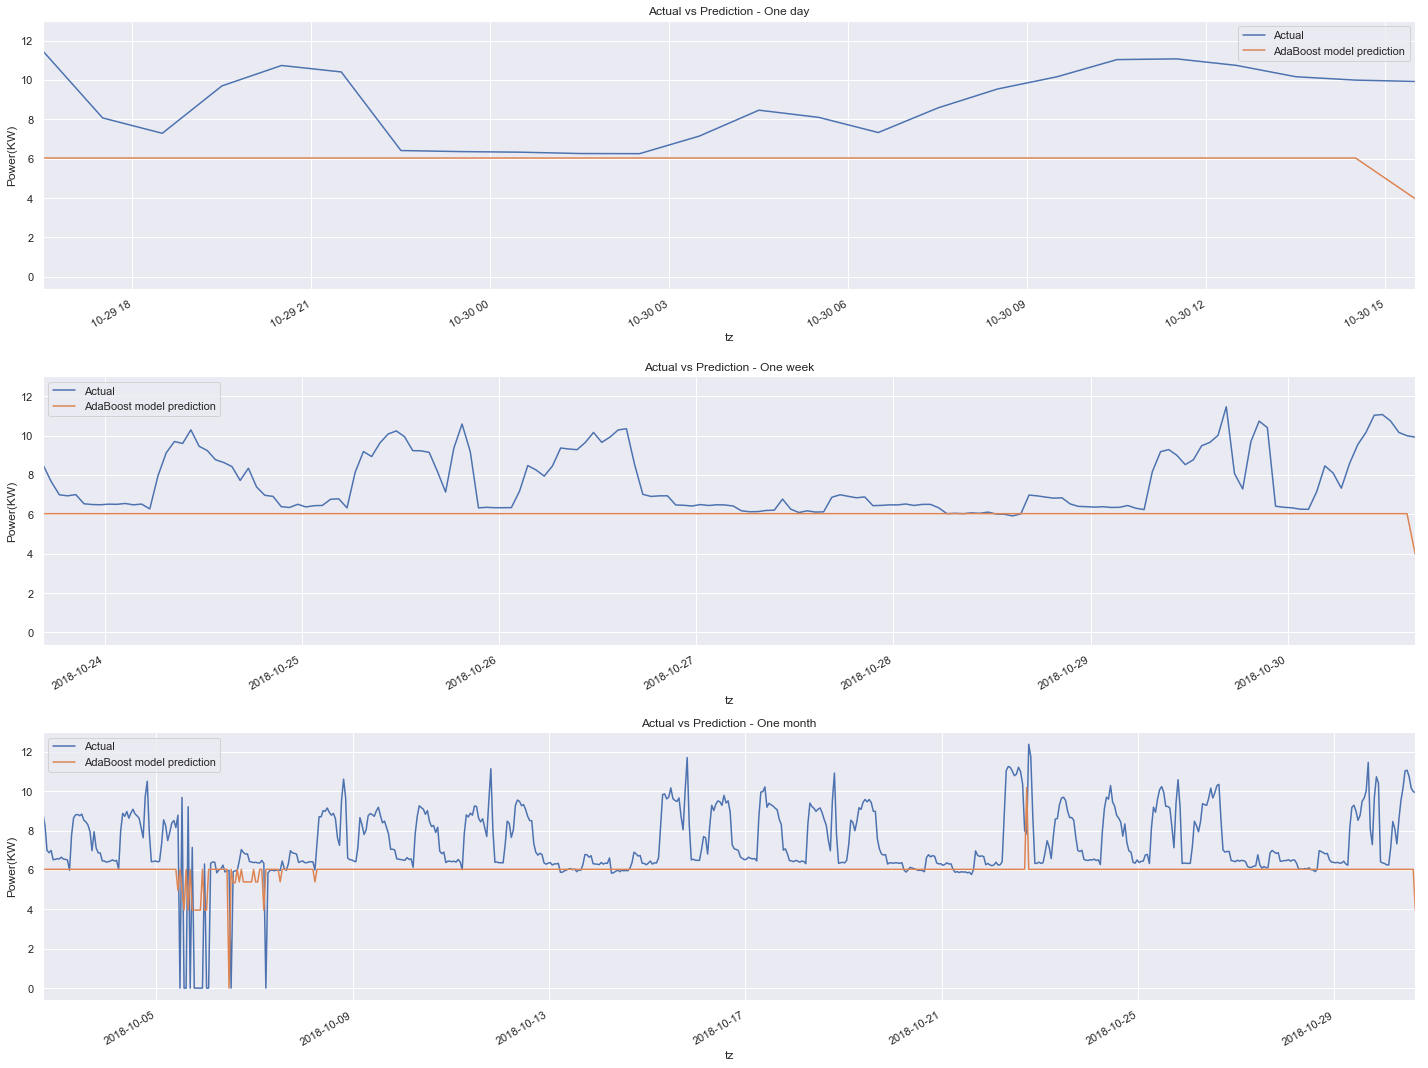

In [145]:
subplot_prediction(y_test, prediction,prediction_label='AdaBoost model prediction')

# Bagging Regressor Model

In [146]:
reg = BaggingRegressor()

In [147]:
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Accuracy: 86.78 
[0.90292725 0.83263297]
R2 Score :0.84 
<function r2_score at 0x00000182B5568AE8>


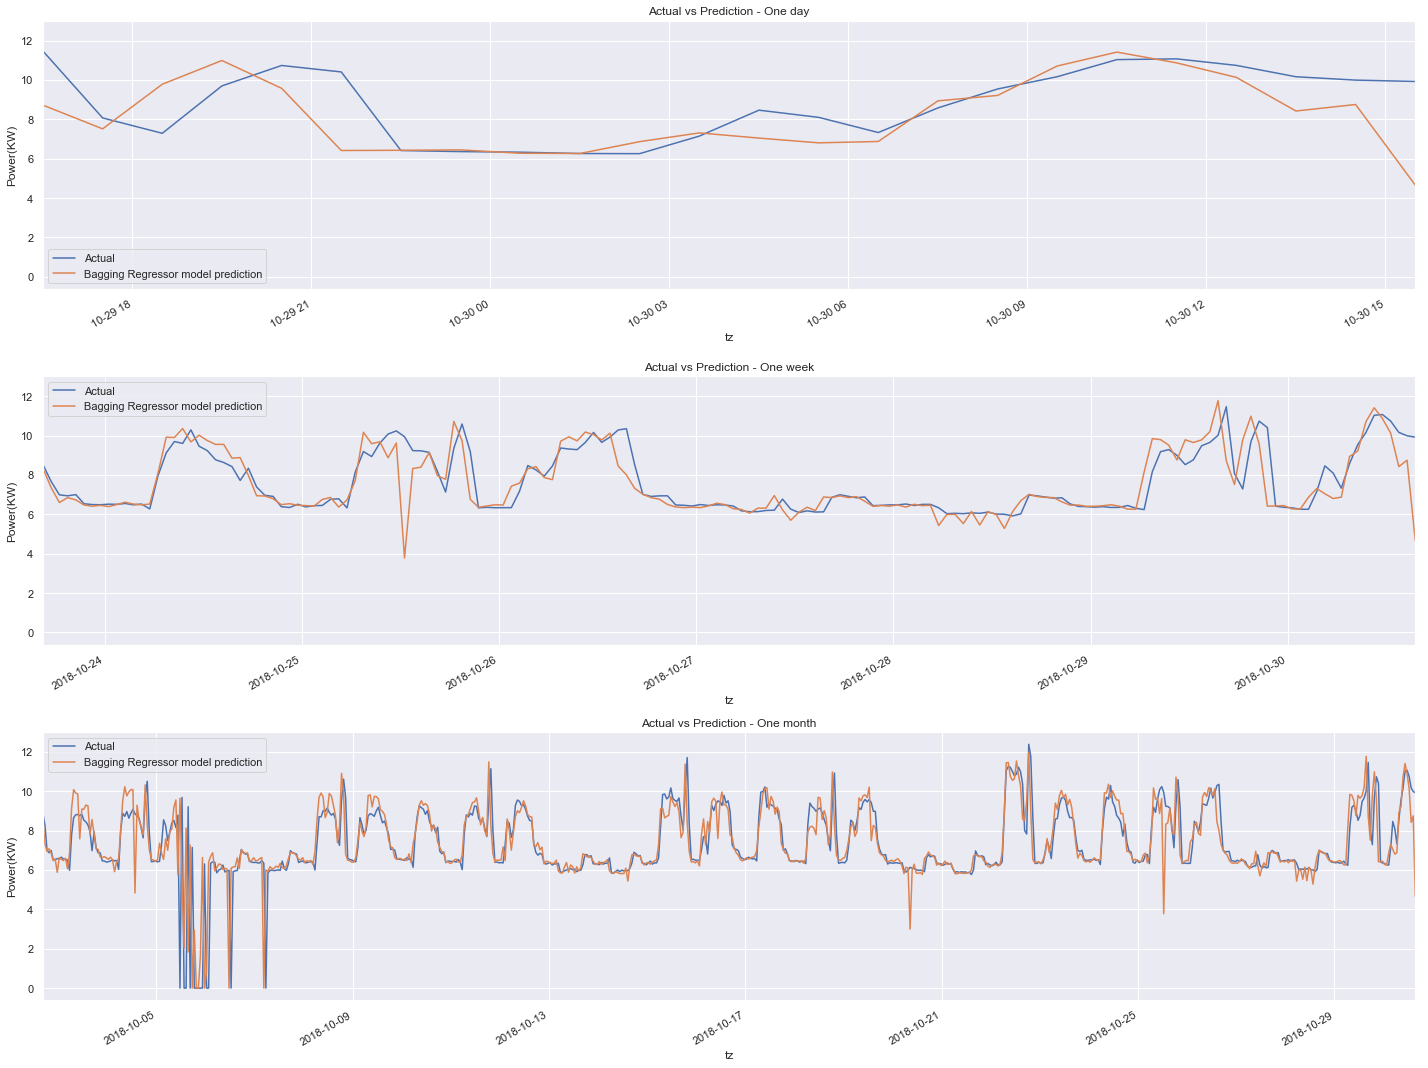

In [148]:
subplot_prediction(y_test, prediction,prediction_label='Bagging Regressor model prediction')

# Extra Trees Regressosr Model

In [149]:
reg = ExtraTreesRegressor()

In [150]:
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Accuracy: 89.71 
[0.96138105 0.83273986]
R2 Score :0.84 
<function r2_score at 0x00000182B5568AE8>


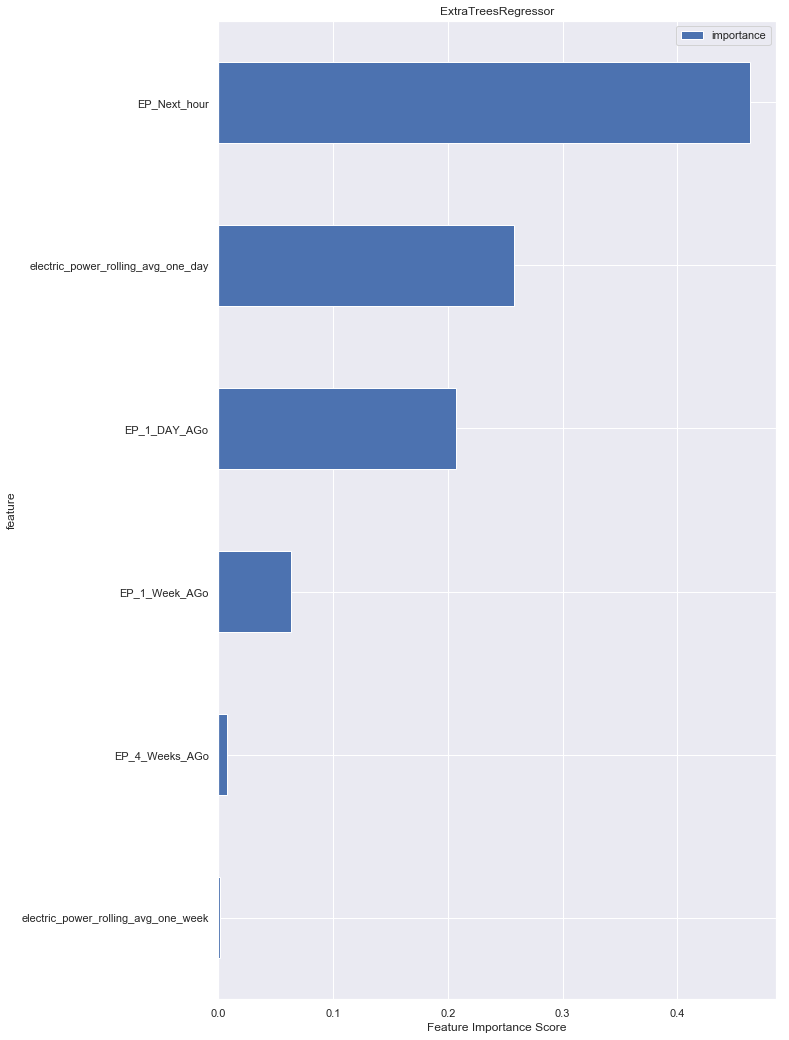

In [151]:
_ = plot_feature_importances(reg, X_train, y_train, top_n=X_train.shape[1], title=reg.__class__.__name__)

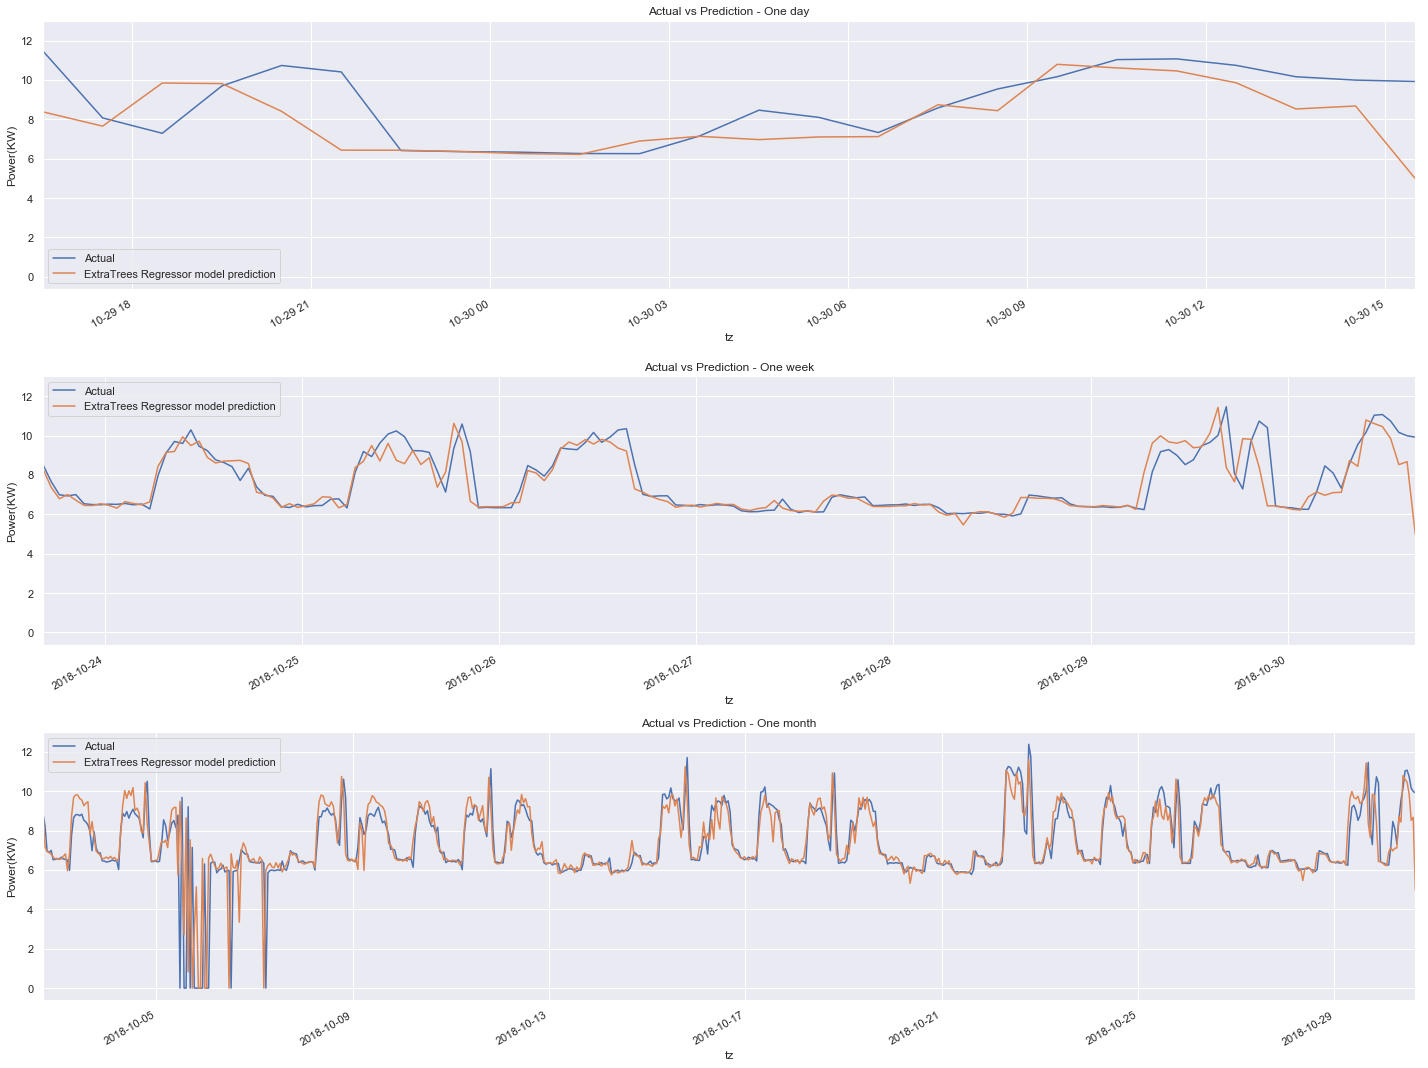

In [152]:
subplot_prediction(y_test, prediction,prediction_label='ExtraTrees Regressor model prediction')

In [153]:
reg = RandomForestRegressor()

In [154]:
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Accuracy: 89.89 
[0.96654062 0.83134766]
R2 Score :0.84 
<function r2_score at 0x00000182B5568AE8>


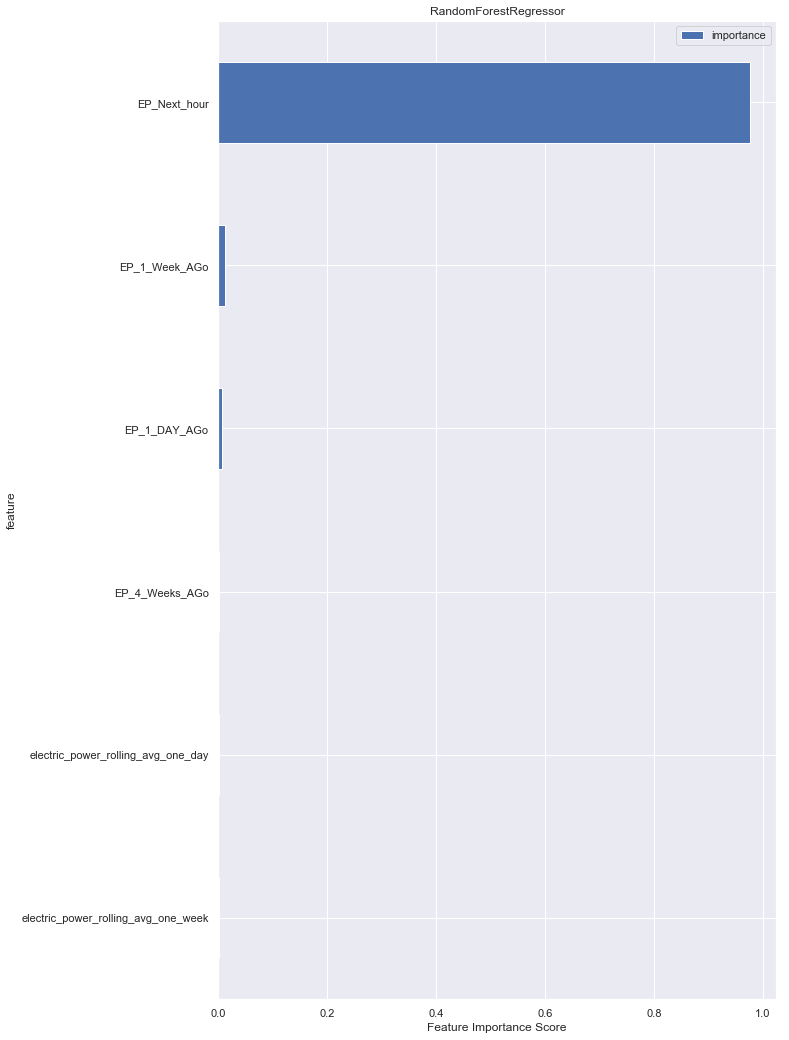

In [155]:
_ = plot_feature_importances(reg, X_train, y_train, top_n=X_train.shape[1], title=reg.__class__.__name__)

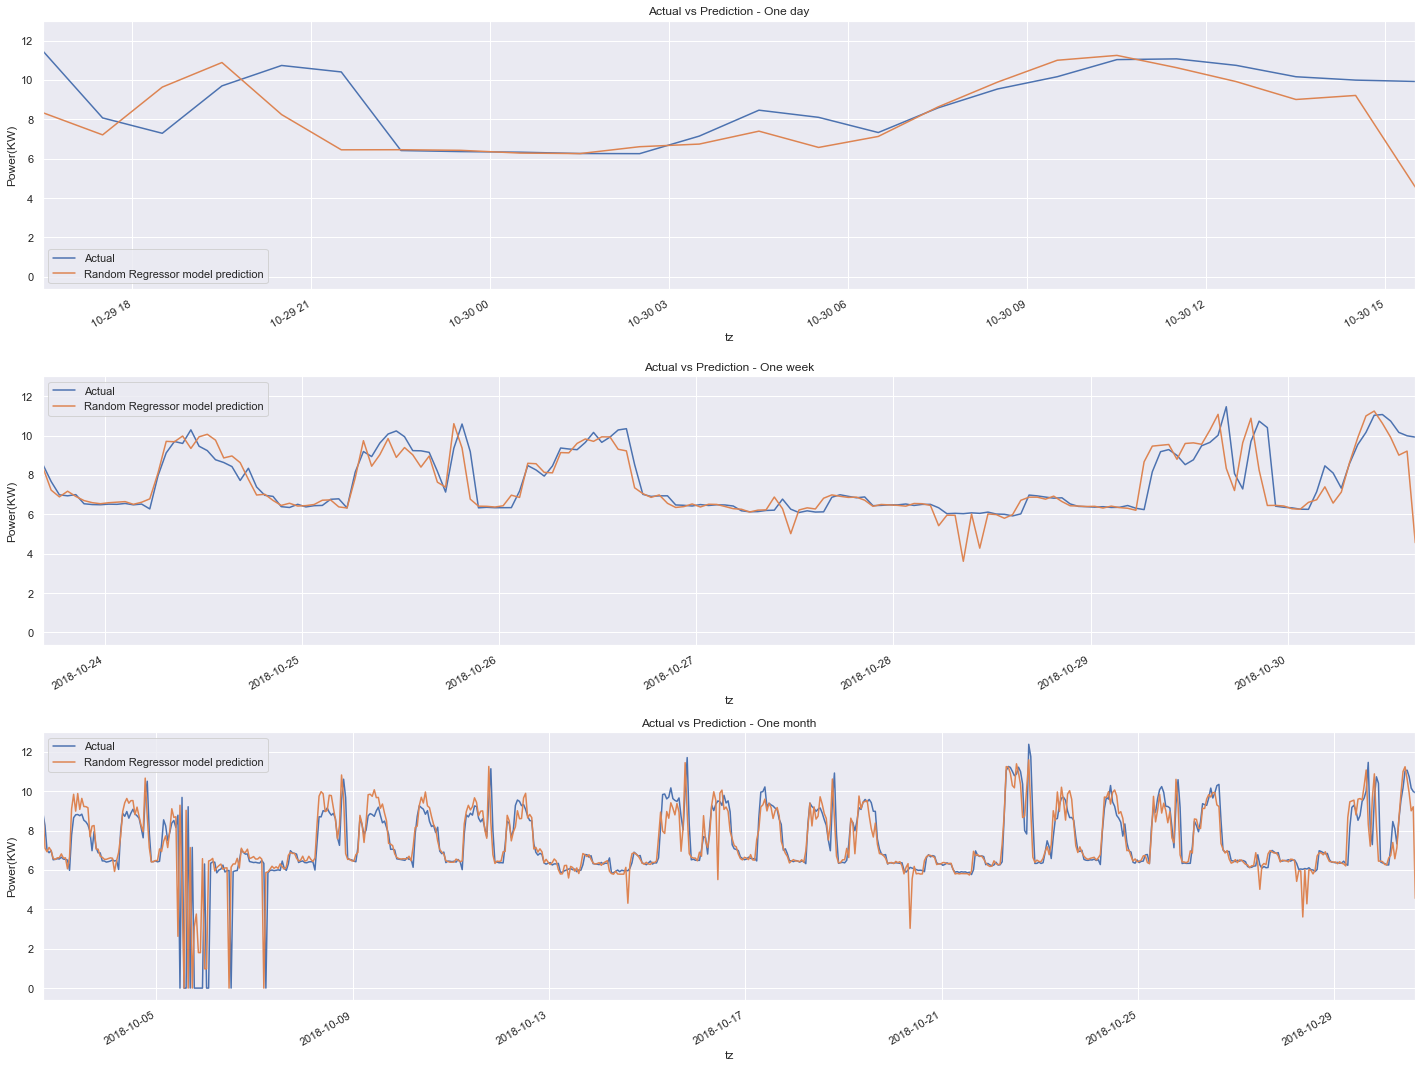

In [156]:
subplot_prediction(y_test, prediction,prediction_label='Random Regressor model prediction')

In [157]:
reg = GradientBoostingRegressor()

In [158]:
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Accuracy: 91.84 
[0.97897431 0.85778076]
R2 Score :0.86 
<function r2_score at 0x00000182B5568AE8>


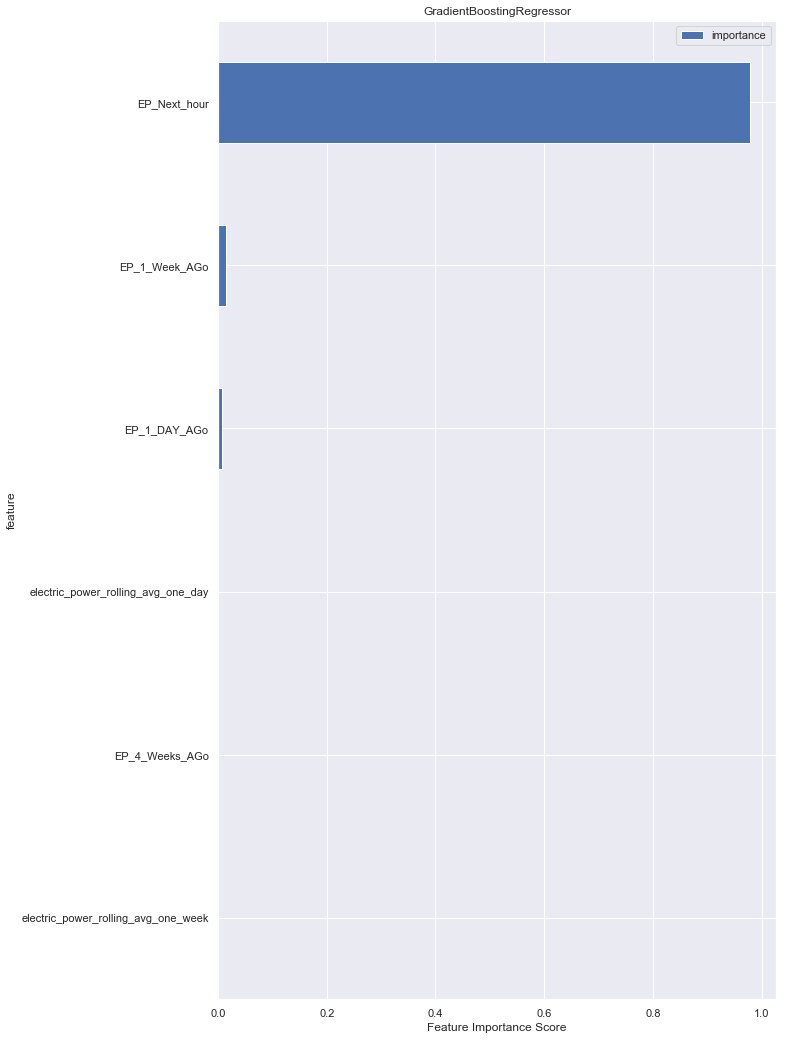

In [159]:
_ = plot_feature_importances(reg, X_train, y_train, top_n=X_train.shape[1], title=reg.__class__.__name__)

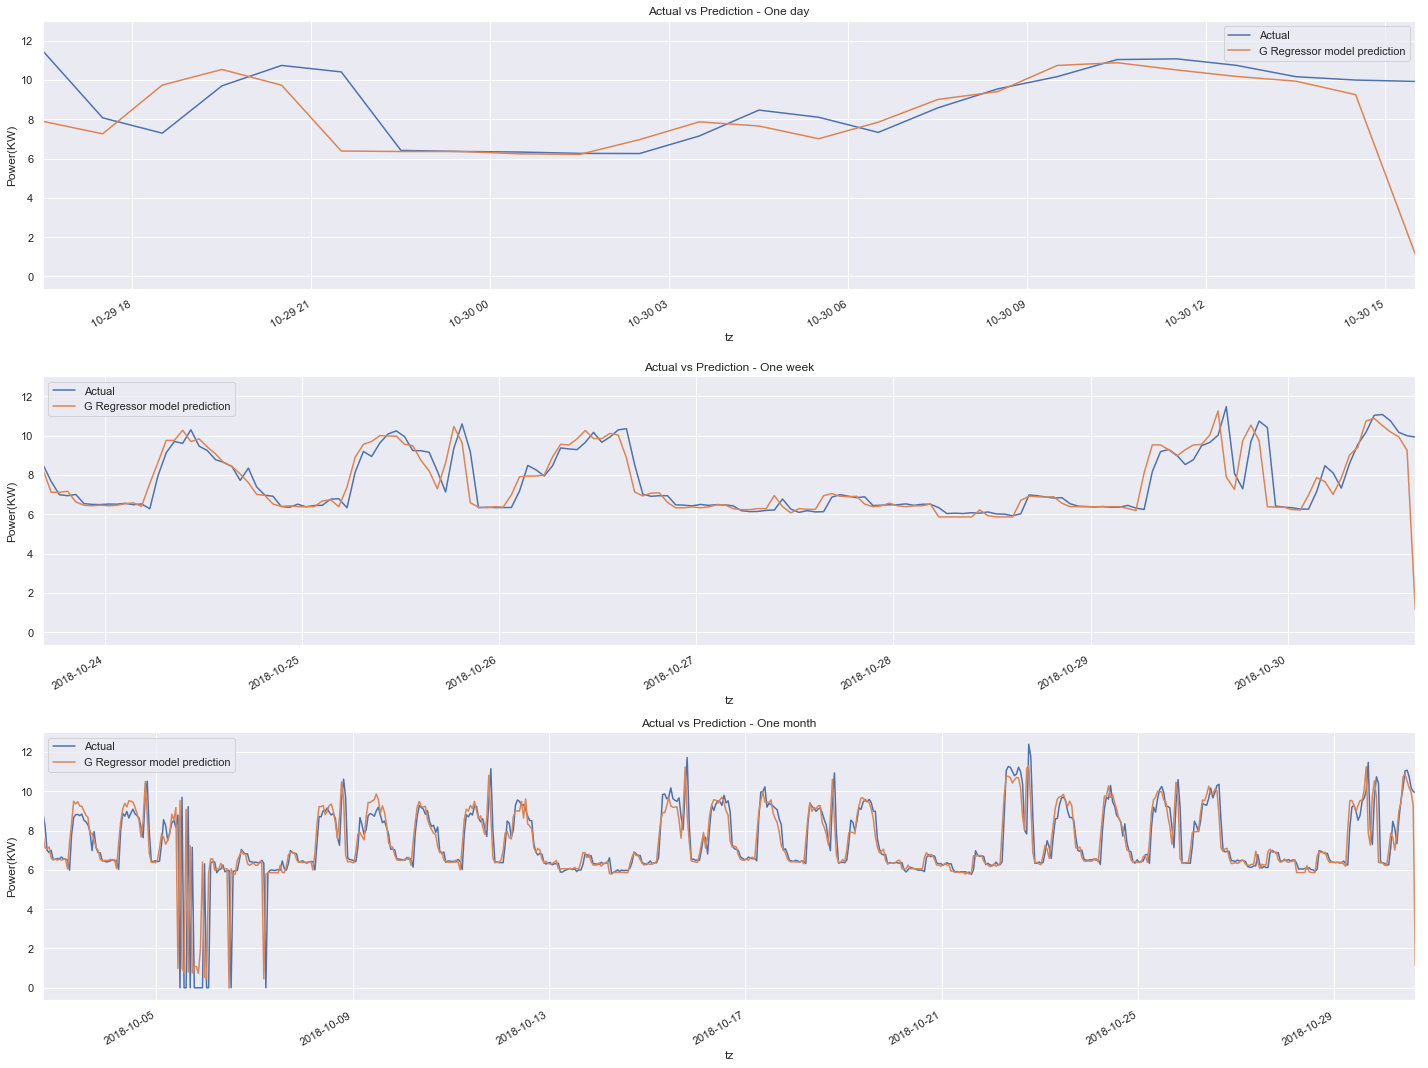

In [160]:
subplot_prediction(y_test, prediction,prediction_label='G Regressor model prediction')

In [161]:
X.shape

(15153, 6)

In [162]:
y.shape

(15153,)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [164]:
y_Train=list(y_train)

In [165]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_predict=model.predict(X_train)

error=0
for i in range(len(y_Train)):
    error+=(abs(y_Train[i]-y_predict[i])/y_Train[i])
train_error_ridge=error/len(y_Train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Y_test=model.predict(X_test)
y_Predict=list(y_test)

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")
tscv = TimeSeriesSplit(n_splits=20)
scores = cross_val_score(model, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Train error = inf percent in Ridge Regression
Test error = inf percent in Ridge Regression
Accuracy: 80.53 
[0.9439418  0.98692435 0.92523057 0.83717817 0.73980571 0.79346208
 0.85962242 0.85362344 0.87661142 0.98021785 0.         1.
 0.95077061 0.92093176 0.81859346 0.74619359 0.7299729  0.75039695
 0.91437223 0.47905714]
R2 Score :0.84 
<function r2_score at 0x00000182B5568AE8>


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

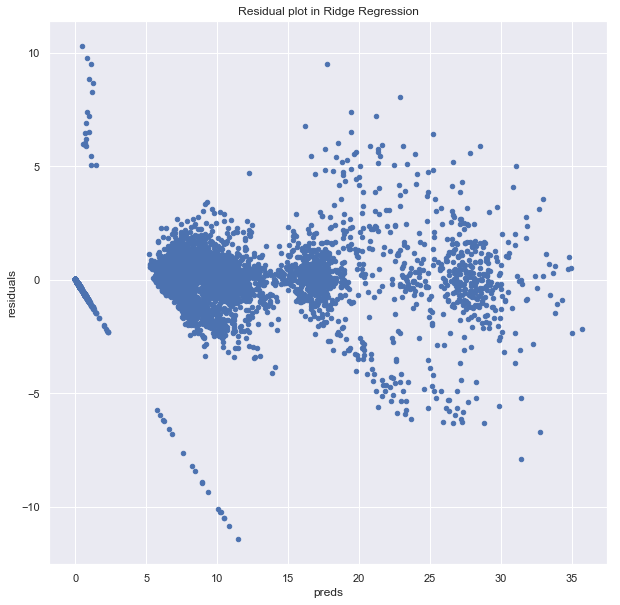

In [166]:
matplotlib.rcParams['figure.figsize'] = (10.0,10.0)

preds = pd.DataFrame({"preds":model.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

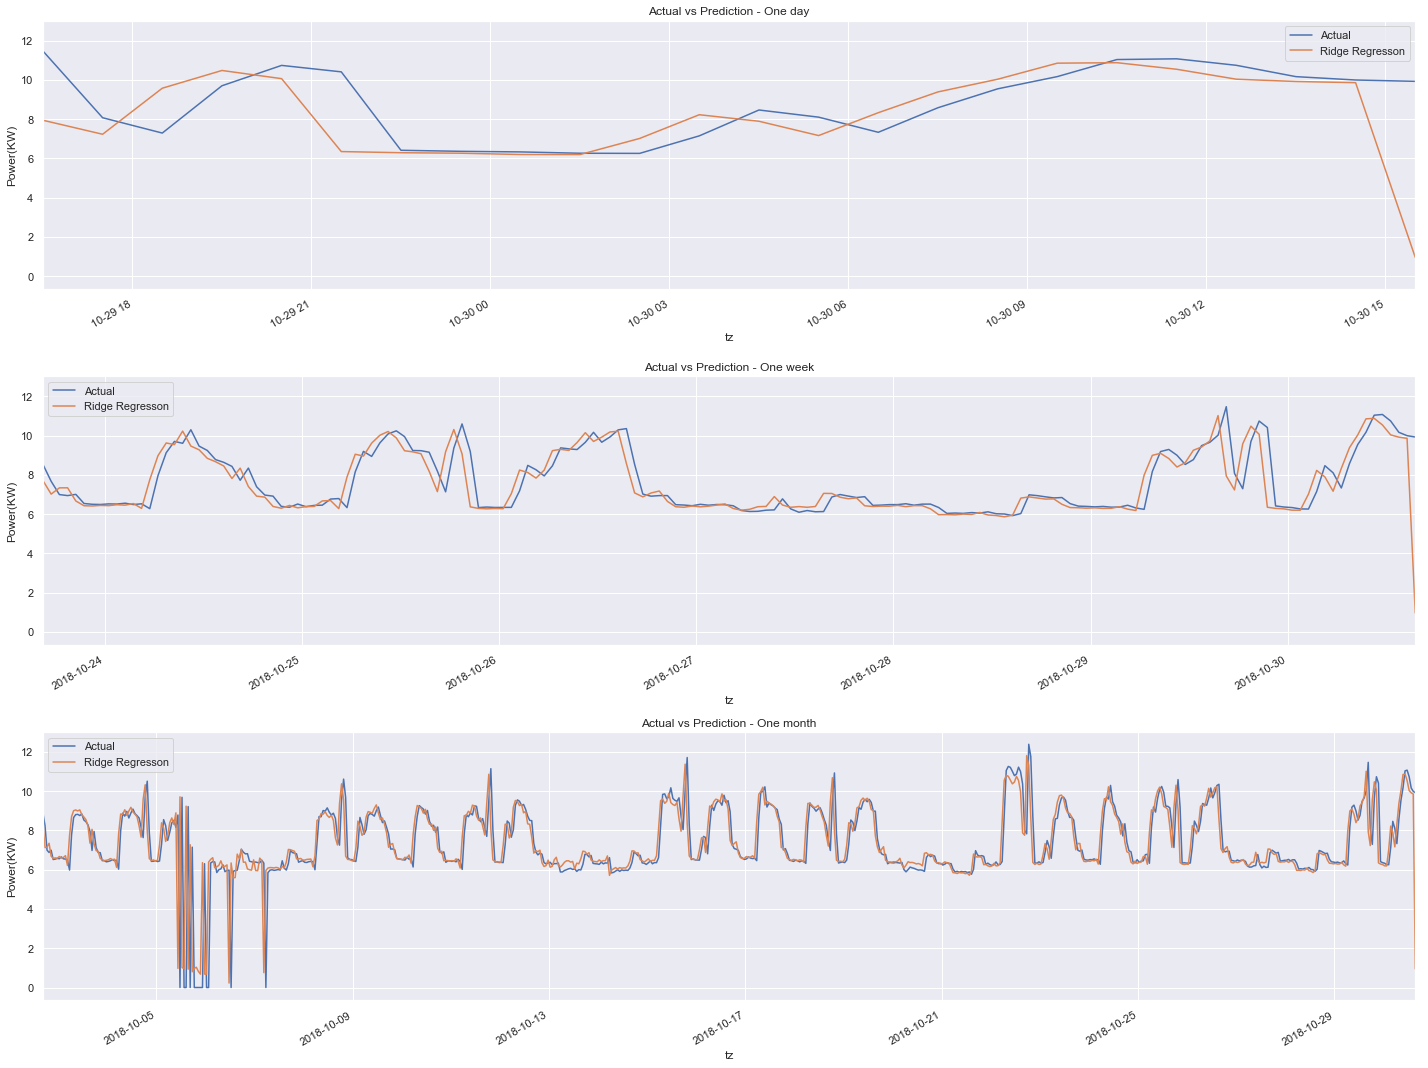

In [167]:
subplot_prediction(y_test, prediction,prediction_label='Ridge Regresson')

In [172]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_Train[i])/y_Train[i])
train_error_knn=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")
Y_test=model.predict(X_test)
y2_knn=knn.predict(X_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-Y_test[i])/Y_test[i])
test_error_knn=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")
tscv = TimeSeriesSplit(n_splits=20)
scores = cross_val_score(knn, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Train error = nan percent in Knn algorithm
Test error = 9.268543729457942 percent in knn algorithm
Accuracy: 63.31 
[ 0.38463154 -1.53788543  0.55314536  0.45817088  0.71990861  0.75054605
  0.83190498  0.84988616  0.84545663  0.85259402  1.          1.
  0.77881614  0.86858543  0.80129025  0.76001186  0.82054862  0.44033205
  0.92231481  0.56271957]
R2 Score :0.84 
<function r2_score at 0x00000182B5568AE8>


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Knn')

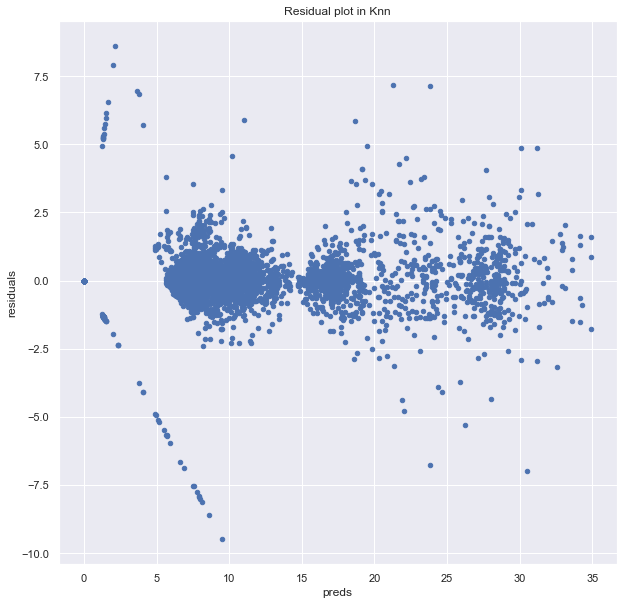

In [173]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
preds = pd.DataFrame({"preds":knn.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

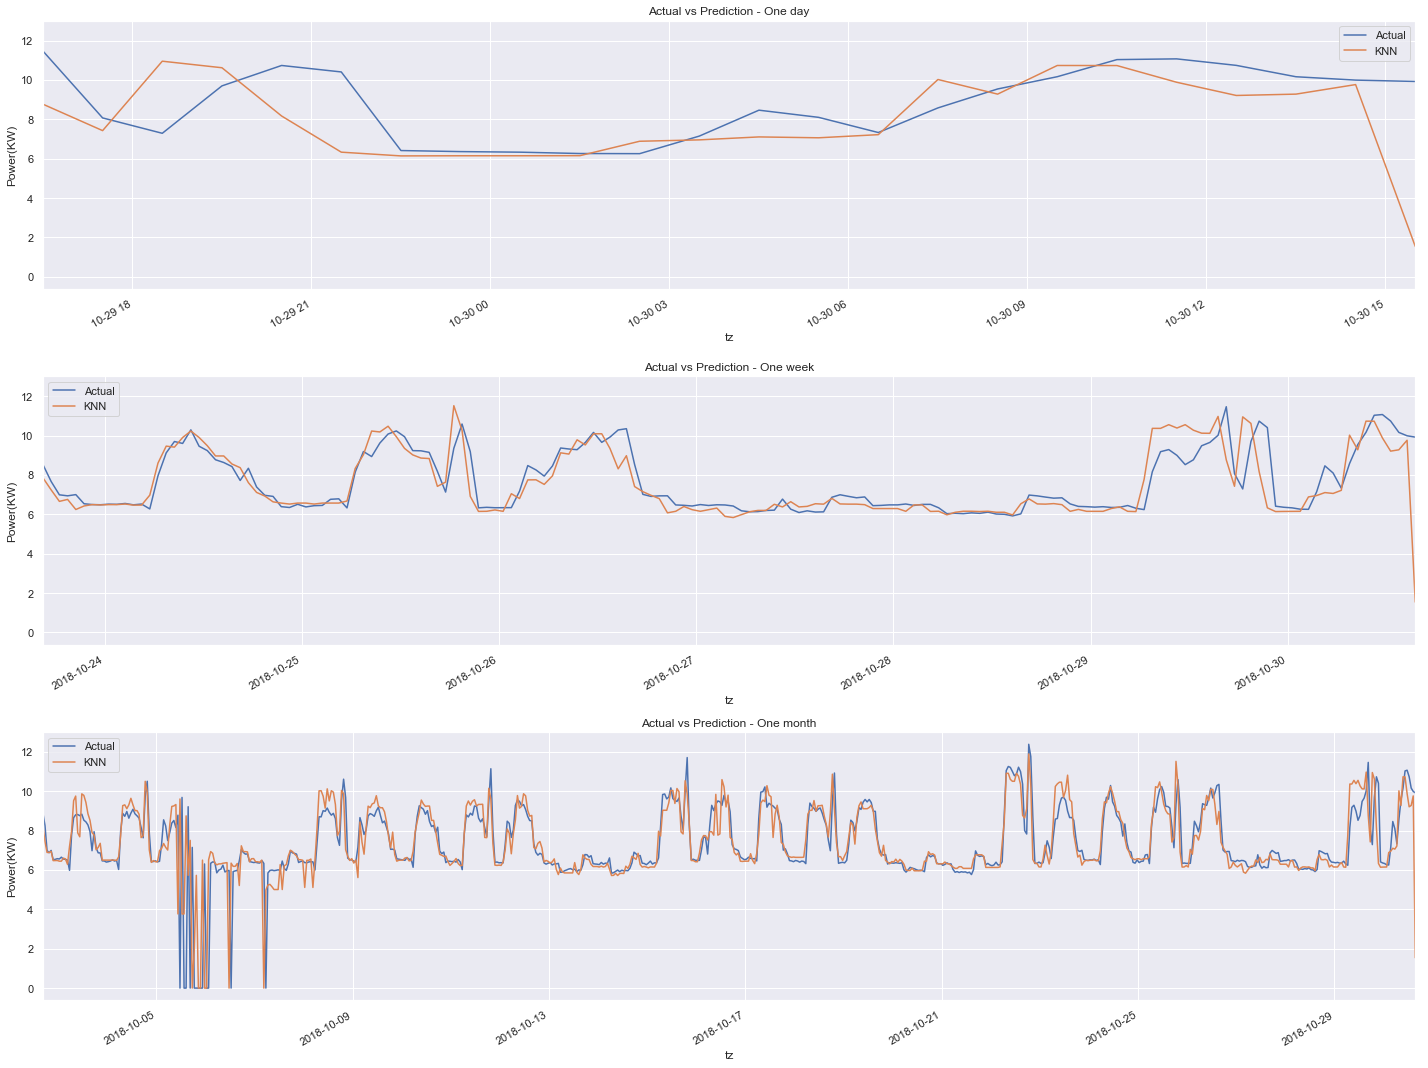

In [174]:
subplot_prediction(y_test, prediction,prediction_label='KNN')

In [175]:
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y1_reg=reg.predict(X_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(X_test)
y2_reg=list(y2_reg)
Y_test=model.predict(X_test)
Y_test=list(Y_test)
error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_Train[i])/y_Train[i])
train_error_bay=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-Y_test[i])/Y_test[i])
test_error_bay=(error/len(Y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")
tscv = TimeSeriesSplit(n_splits=20)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Train error = inf percent in Bayesian Regression
Test error = 0.0020628576292893506 percent in Bayesian Regression
Accuracy: 80.53 
[0.94339205 0.98691871 0.92523383 0.83718632 0.73983707 0.79346891
 0.85962866 0.85363581 0.87662514 0.98021626 0.         1.
 0.95076651 0.9209288  0.81859561 0.74620947 0.72998964 0.7504102
 0.91437018 0.47907692]
R2 Score :0.84 
<function r2_score at 0x00000182B5568AE8>


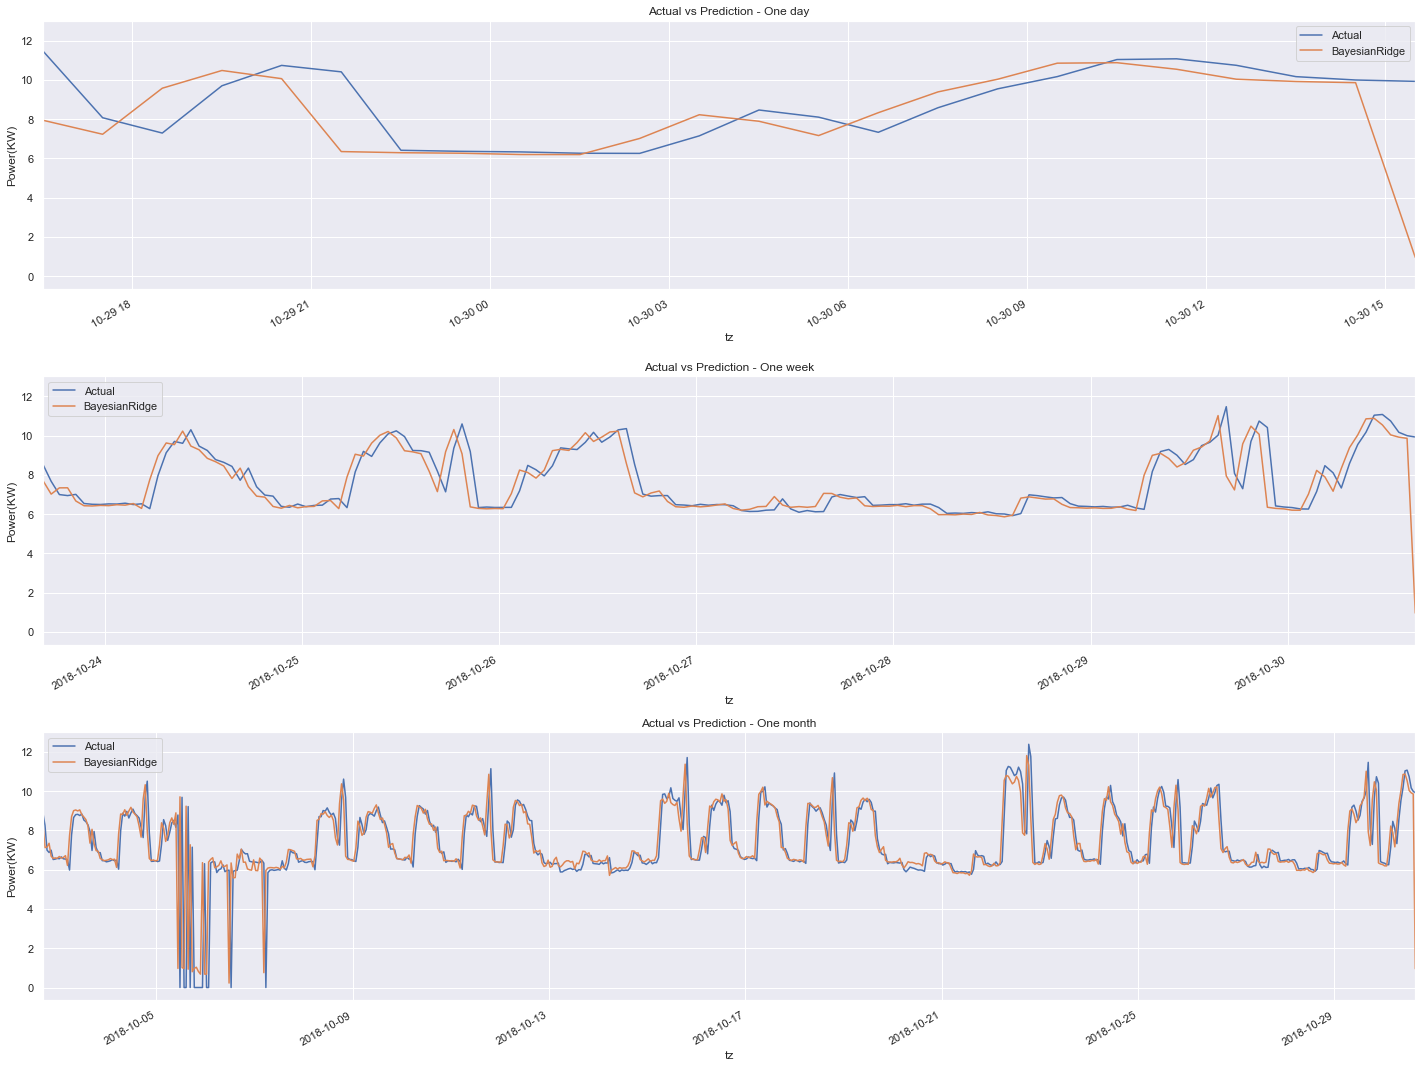

In [176]:
subplot_prediction(y_test, prediction,prediction_label='BayesianRidge')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

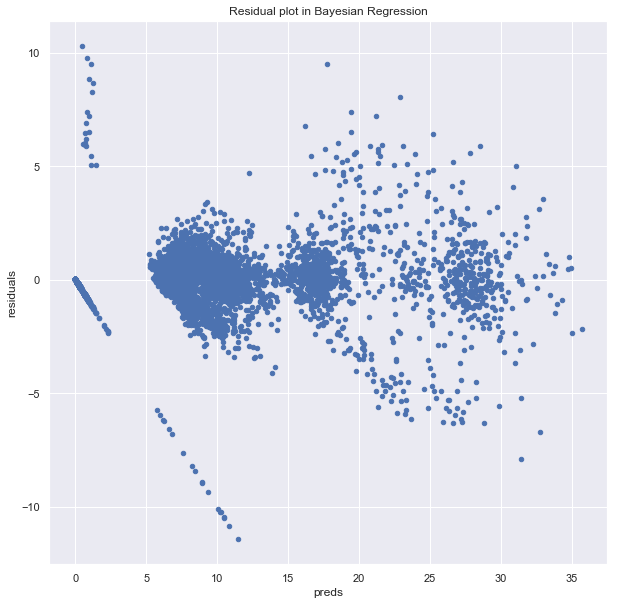

In [177]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
preds = pd.DataFrame({"preds":reg.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

In [182]:
dec = tree.DecisionTreeRegressor(max_depth=20)
dec.fit(X_train,y_train)
y1_dec=dec.predict(X_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(X_test)
y2_dec=list(y2_dec)
Y_test=model.predict(X_test)
error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-Y_test[i])/Y_test[i])
test_error_tree=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

scores = cross_val_score(dec, X.values, y.values, cv=2
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
dec.fit(X_train,y_train)
prediction = dec.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Train error = nan percent in Decision Tree Regressor
Test error = -682.5995728740876 percent in Decision Tree Regressor
Accuracy: 73.70 
[0.55554199 0.91837165]
R2 Score :0.70 
<function r2_score at 0x00000182B5568AE8>


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Decision Tree')

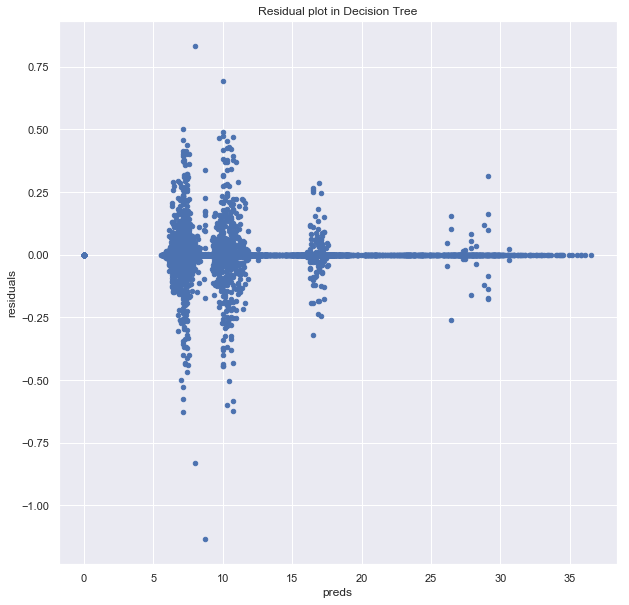

In [183]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
preds = pd.DataFrame({"preds":dec.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

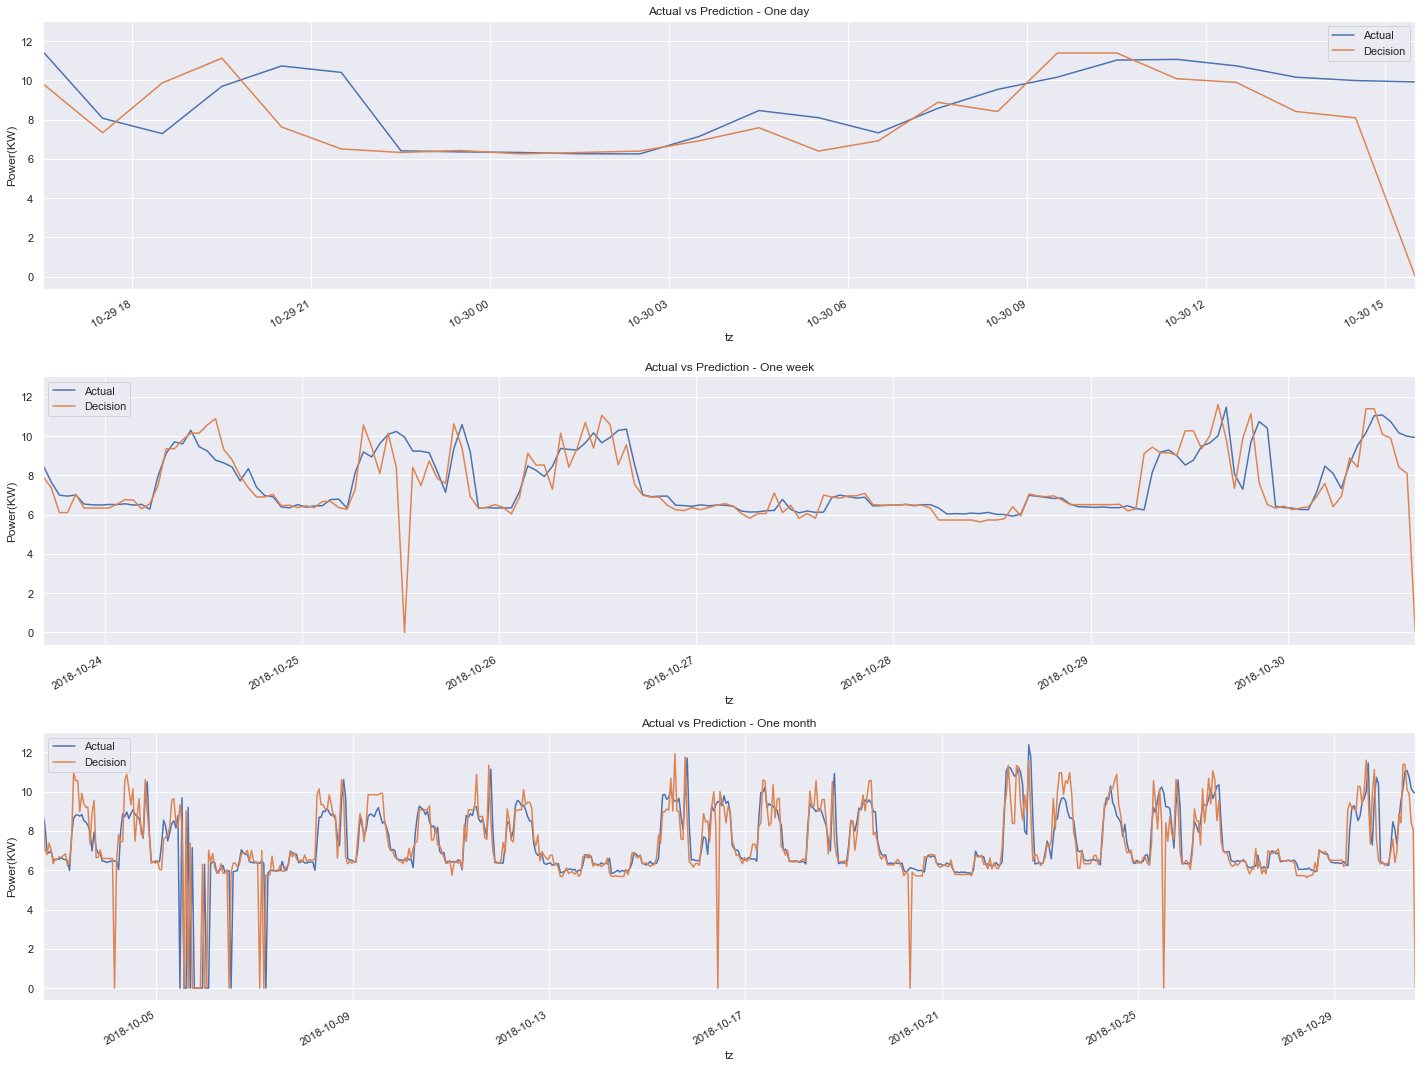

In [184]:
subplot_prediction(y_test, prediction,prediction_label='Decision')

In [185]:
svm_reg=svm.SVR()
svm_reg.fit(X_train,y_train)
y1_svm=svm_reg.predict(X_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(X_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_Train[i])/y_Train[i])
train_error_svm=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-Y_test[i])/Y_test[i])
test_error_svm=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")
tscv = TimeSeriesSplit(n_splits=20)
scores = cross_val_score(svm_reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f " % (scores.mean()*100))
print(scores)
svm_reg.fit(X_train,y_train)
prediction = svm_reg.predict(X_test)
print("R2 Score :%0.2f "% r2_score(y_test,prediction))
print(r2_score)

Train error = inf percent in SVM Regressor
Test error = 36.58920245912122 percent in SVM Regressor
Accuracy: 21.91 
[-3.36302819e-02  6.38969015e-04 -2.96471560e-02 -1.76928216e+00
 -1.82193304e+00  4.20766670e-03  7.01752815e-01  7.00724987e-01
  8.64906361e-01 -6.40557458e-02  0.00000000e+00  1.00000000e+00
  2.66870548e-01  4.67757336e-01  4.32764653e-01  8.35210603e-01
  8.49733648e-01  6.02979579e-01  8.31244538e-01  5.41030536e-01]
R2 Score :0.54 
<function r2_score at 0x00000182B5568AE8>


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in SVM')

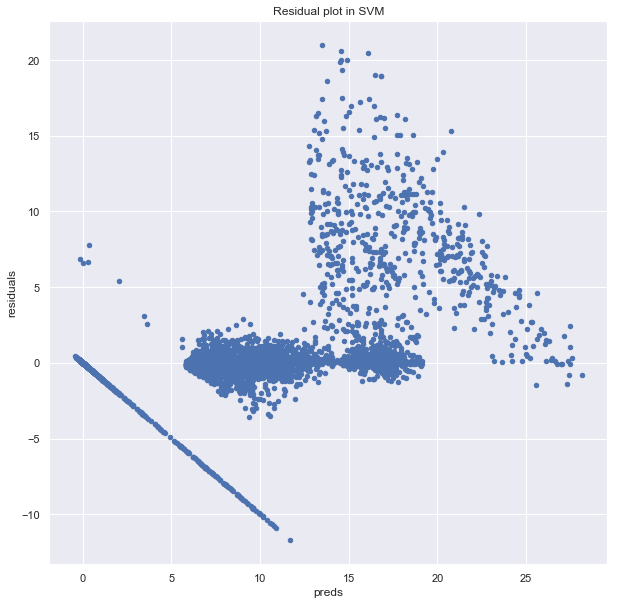

In [186]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
preds = pd.DataFrame({"preds":svm_reg.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

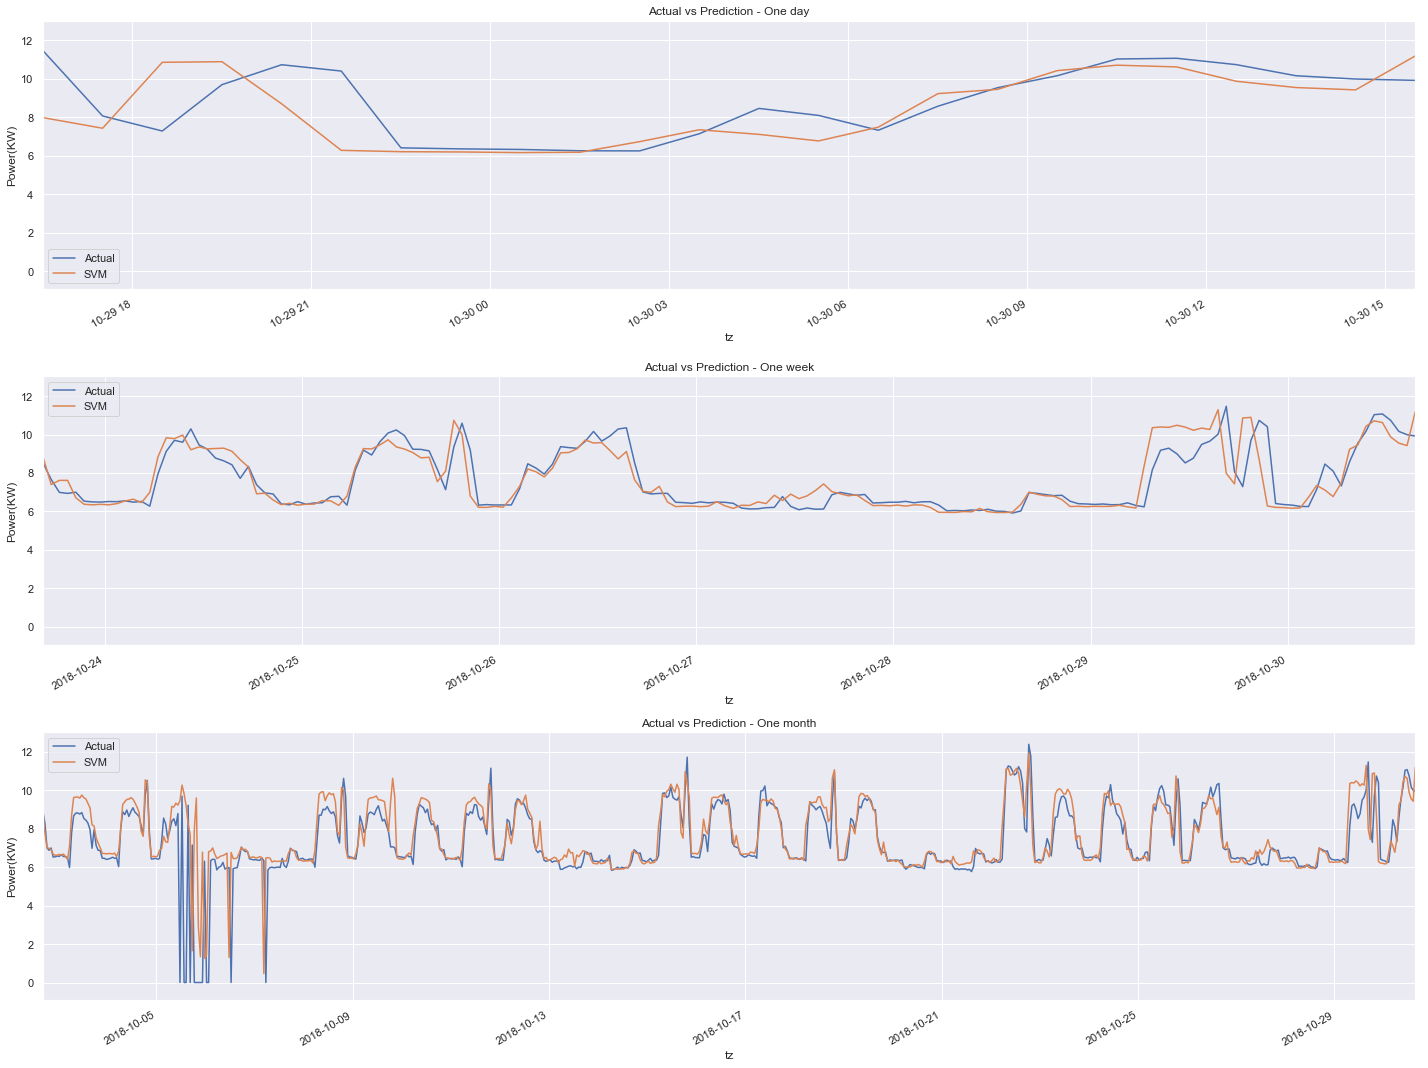

In [187]:
subplot_prediction(y_test, prediction,prediction_label='SVM')

In [188]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

Text(0, 0.5, 'Cumulative explained variance')

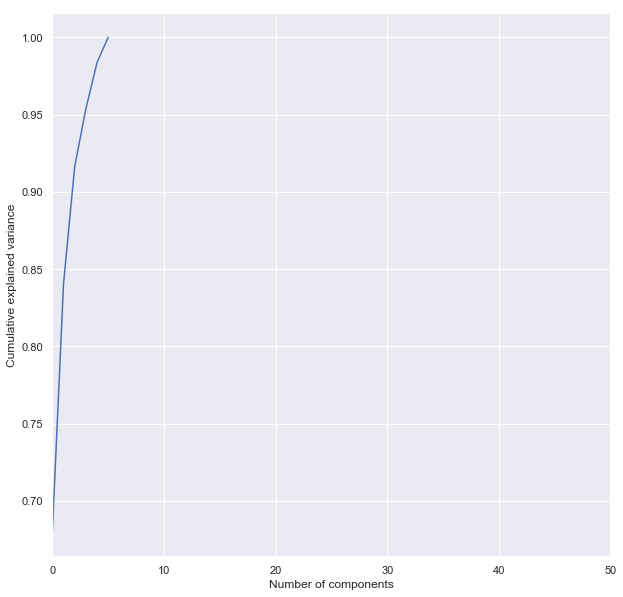

In [189]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,50,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

(-10, 10)

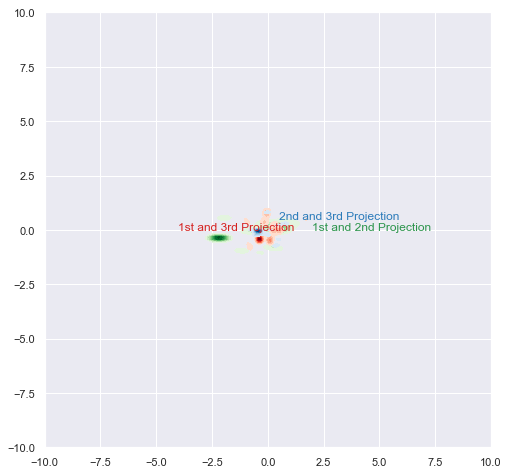

In [190]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-10,10)
plt.ylim(-10,10)